# Practical introduction to Machine Learning
## Classification - Tom Reppelin

**IMPORTS**

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay,confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler

#### 1.3 Loading the data

**First Dataset : Pima**

In [2]:
pima = np.load("pima.npz")
x_1 = pima['xall']
y_1 = pima['yall']
varnames = pima['varnames']


In [3]:
x_1.shape

(709, 8)

In [4]:
y_1.shape

(709,)

• Pregnancies Number of times pregnant

• Glucose Plasma glucose concentration a 2 hours in an oral glucose tolerance test

• BloodPressure Diastolic blood pressure (mm Hg)

• SkinThickness Triceps skin fold thickness (mm)

• Insulin 2-Hour serum insulin (mu U/ml)

• BMI Body mass index (weight in kg/(height in m)2)

• DiabetesPedigreeFunction Diabetes pedigree function

• Age Age (years)


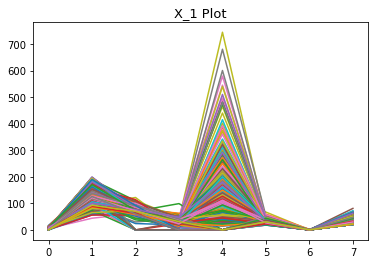

In [5]:
pl.plot(x_1.T)
pl.title("X_1 Plot", fontsize = 13)
pl.show()

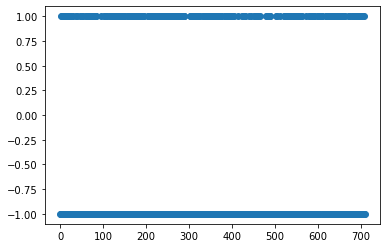

In [6]:
pl.plot(y_1, linestyle='', marker = 'o')

Y samples are a +1, or a -1

**Second Dataset : Digits**

In [7]:
digits = np.load("digits.npz")

x,xt = digits["x"], digits["xt"]
y,yt = digits["y"], digits["yt"]

          
#pre-processing

xx = x.reshape((len(x), 28, 28))
xxt = xt.reshape((len(xt), 28, 28))

# normalize 

scaler = StandardScaler()
scaler.fit(x)
x_n = scaler.transform(x)
x_t = scaler.transform(xt)
print(np.var(x))
x = x_n
xt = x_t
print(np.var(x))

5545.769131211889
0.7665816326530617


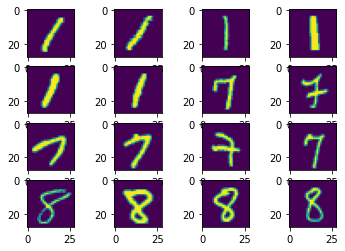

In [8]:
for i in range(16):
    pl.subplot(4, 4, i+1)
    pl.imshow(xx[i*180])

### 2 Predicting Diabetes on the Pima dataset
#### 2.1 Know the data

In [9]:
d = pd.DataFrame(x_1, columns=varnames)
d['Diabete'] = y_1
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabete
0,7.0,159.0,64.0,0.0,0.0,27.4,0.294,40.0,-1
1,0.0,180.0,66.0,39.0,0.0,42.0,1.893,25.0,1
2,1.0,146.0,56.0,0.0,0.0,29.7,0.564,29.0,-1
3,2.0,71.0,70.0,27.0,0.0,28.0,0.586,22.0,-1
4,7.0,103.0,66.0,32.0,0.0,39.1,0.344,31.0,1
...,...,...,...,...,...,...,...,...,...
704,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,-1
705,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,-1
706,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,-1
707,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


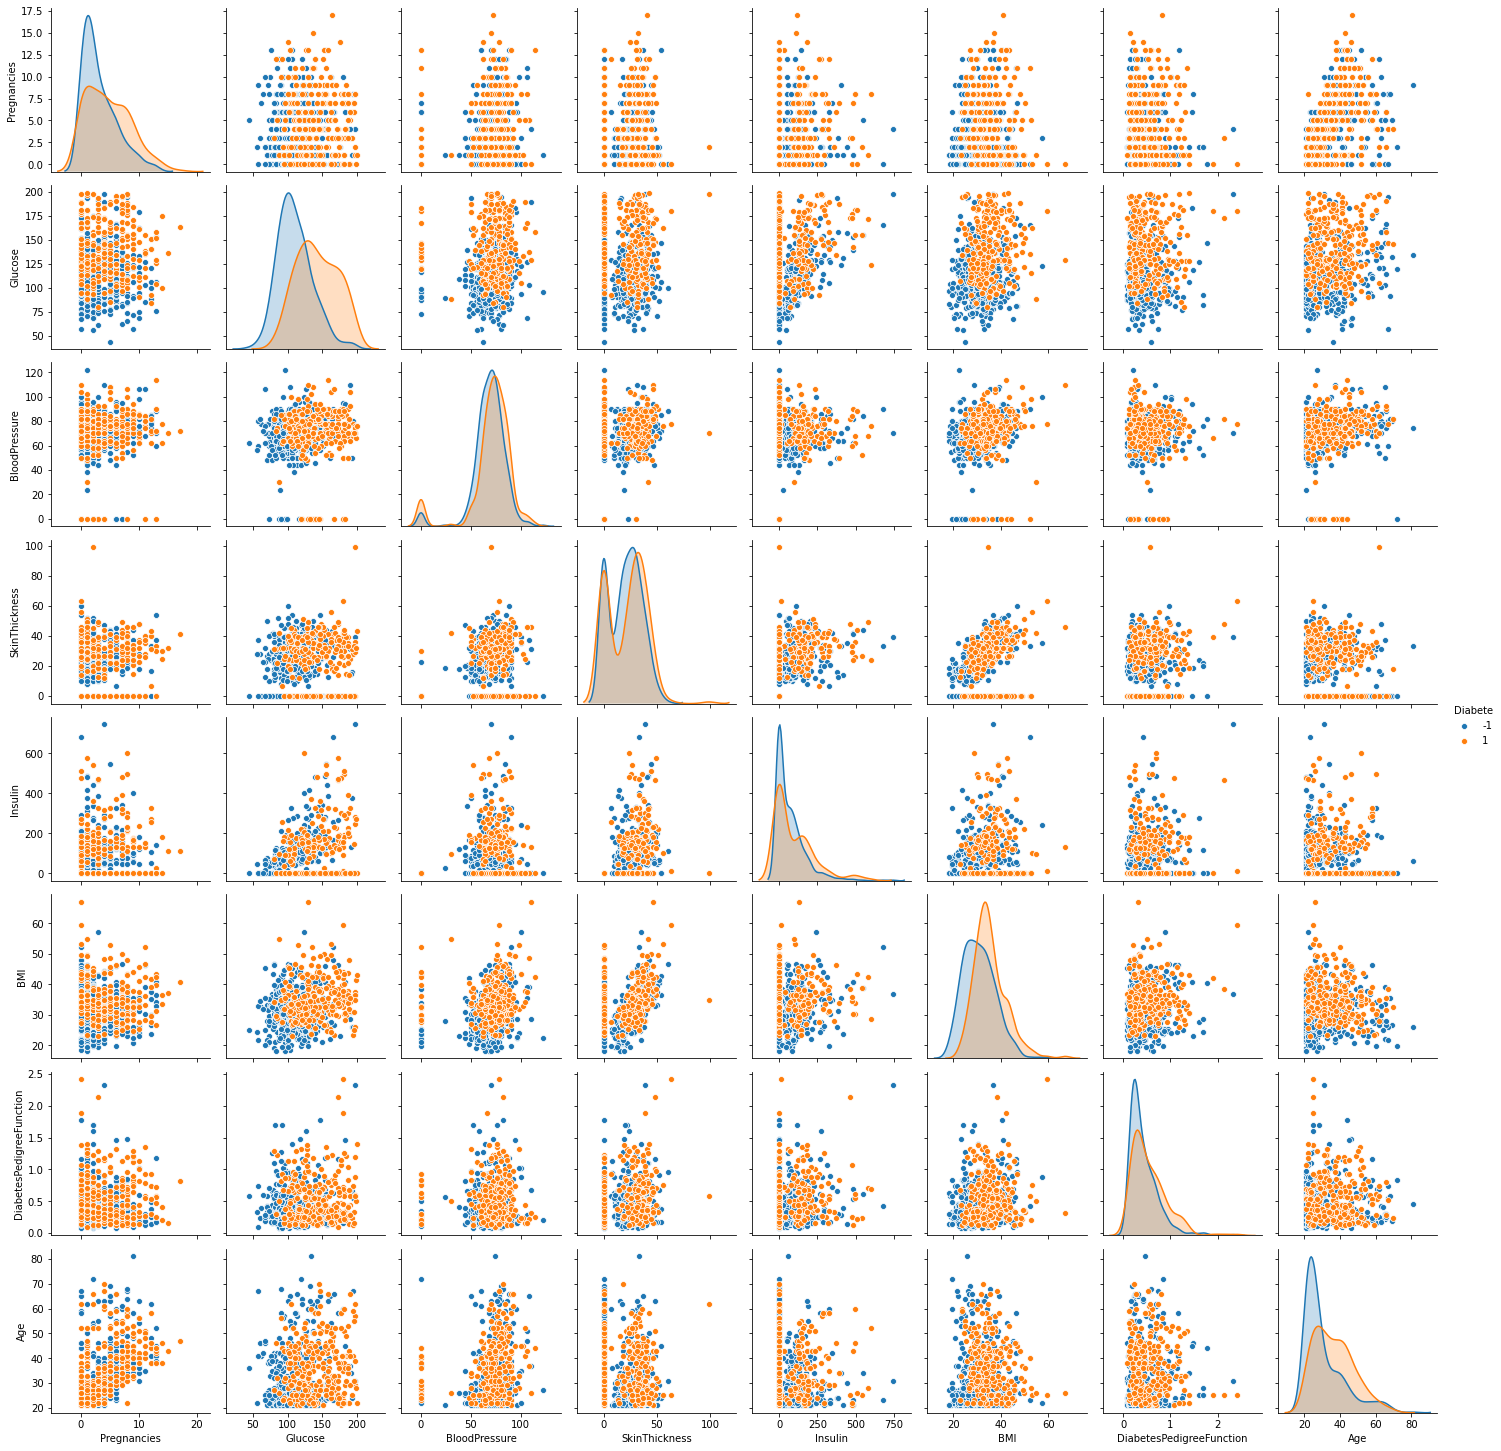

In [10]:
sns.pairplot(data=d, hue = 'Diabete')

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, train_size=300, random_state = 20 )
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((300, 8), (409, 8), (300,), (409,))

In [12]:
np.var(x_train), np.var(x_test), np.var(y_train), np.var(y_test)

(3031.2695886587494, 3560.8073809845796, 0.8452888888888889, 0.931558276193949)

In [13]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
np.var(x_train_norm)

1.0

x.fit sur x_norm
x.predict sur x_test

### 2.2 Bayesian decision and linear classification

**LDA**

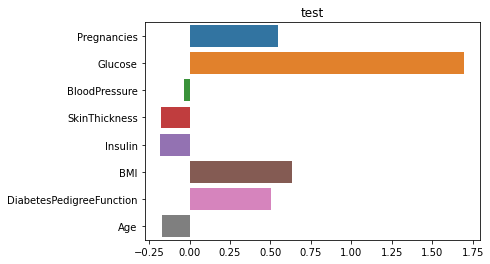

In [15]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_norm, y_train)
y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)
prob = clf.predict_proba(x_test)
roc = roc_auc_score(y_test, prob[:,1])

pl.title("test")
sns.barplot(x = clf.coef_.flatten(), y=varnames)
pl.show()

In [16]:
print('Score LDA = ', score)
print('Roc Auc Score LDA',roc)
        

Score LDA =  0.7628361858190709
Roc Auc Score LDA 0.831972893885723


In [17]:
columns = ['Model', 'Score ', 'Roc Auc Score ']
SCORE = pd.DataFrame(columns=columns)

res = {
'Model' : ['LDA'], 
'Score ': [score],
'Roc Auc Score ': [roc], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973


**GridSearchCV**

In [18]:
list_shri = []
for i in range (1,100):
    list_shri.append(i/100)
#print(list_shri)

parameters = {'shrinkage' : list_shri}
#print(parameters)
#print(clf.get_params().keys())

clf2 = GridSearchCV(LinearDiscriminantAnalysis(solver = 'eigen'), parameters)
clf2.fit(x_train_norm, y_train)
print(clf2.best_estimator_)


LinearDiscriminantAnalysis(shrinkage=0.23, solver='eigen')


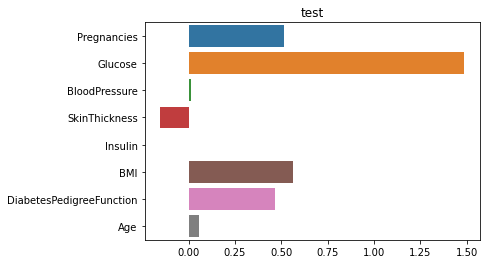

In [19]:
lda_p = LinearDiscriminantAnalysis(shrinkage=0.23, solver='eigen')
lda_p.fit(x_train_norm, y_train)
y_pred = lda_p.predict(x_test)
score_2 = lda_p.score(x_test, y_test)
prob_2 = lda_p.predict_proba(x_test)
roc_2 = roc_auc_score(y_test, prob_2[:,1])

pl.title("test")
sns.barplot(x= lda_p.coef_.flatten(), y=varnames)
pl.show()

In [20]:
print('Score with GridSearchCV = ', score_2)
print('Roc Auc Score witth GridSearchCV', roc_2)
res = {
'Model' : ['LDA best shrinkage'], 
'Score ': [score_2],
'Roc Auc Score ': [roc_2], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

Score with GridSearchCV =  0.7603911980440098
Roc Auc Score witth GridSearchCV 0.8347964474562349


,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796


<div class="alert alert-block alert-success">
    Interpretation:
    the validation leds to better ROC Auc Score but worse Score.

**QDA**

In [21]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_norm, y_train)
y_pred = qda.predict(x_test)
score_3 = qda.score(x_test, y_test)
prob_3 = qda.predict_proba(x_test)
roc_3 = roc_auc_score(y_test, prob_3[:,1])


In [22]:
print('Score QDA = ', score_3)
print('Roc Auc Score QDA',roc_3)
        

Score QDA =  0.7677261613691931
Roc Auc Score QDA 0.819857282201345


In [23]:
res = {
'Model' : ['QDA default'], 
'Score ': [score_3],
'Roc Auc Score ': [roc_3], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857


<div class="alert alert-block alert-success">
Interpretation:
    The QDA default leads to better Score and worse Roc Auc Score than the LDA.

**GridSearchCV for QDA**

In [24]:
list_reg = []
for i in range (1,100):
    list_reg.append(i/100)
#print(list_shri)

parameters = {'reg_param' : list_reg}
#print(parameters)
#print(clf.get_params().keys())

qda = GridSearchCV(QuadraticDiscriminantAnalysis(), parameters)
qda.fit(x_train_norm, y_train)
print(qda.best_estimator_)

QuadraticDiscriminantAnalysis(reg_param=0.48)


In [25]:
qda_p = QuadraticDiscriminantAnalysis(reg_param=0.48)
qda_p.fit(x_train_norm, y_train)
y_pred = qda_p.predict(x_test)
score_4 = qda_p.score(x_test, y_test)
prob_4 = qda_p.predict_proba(x_test)
roc_4 = roc_auc_score(y_test, prob_4[:,1])

In [26]:
print('Score QDA with GridSearchCV = ', score_4)
print('Roc Auc Score QDA with GridSearchCV',roc_4)

Score QDA with GridSearchCV =  0.7432762836185819
Roc Auc Score QDA with GridSearchCV 0.831536526515735


In [27]:
res = {
'Model' : ['QDA best reg_param'], 
'Score ': [score_4],
'Roc Auc Score ': [roc_4], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537


<div class="alert alert-block alert-success">
    Interpretation:
    QDA's best param Score and RAS are worse than the normal LDA

**GaussianNB**

In [28]:
GNB = GaussianNB()
GNB.fit(x_train_norm, y_train)
y_pred = GNB.predict(x_test)
score_5 = GNB.score(x_test, y_test)
prob_5 = GNB.predict_proba(x_test)
roc_5 = roc_auc_score(y_test, prob_5[:,1])

In [29]:
print('Score GaussianNB = ', score_5)
print('Roc Auc Score GaussianNB',roc_5)

Score GaussianNB =  0.7481662591687042
Roc Auc Score GaussianNB 0.8137994763591561


In [30]:
res = {
'Model' : ['Gaussian NB default'], 
'Score ': [score_5],
'Roc Auc Score ': [roc_5], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799


<div class="alert alert-block alert-success">
Interpretation:
Same case of the  QDA : not better

**LogisticRegression**

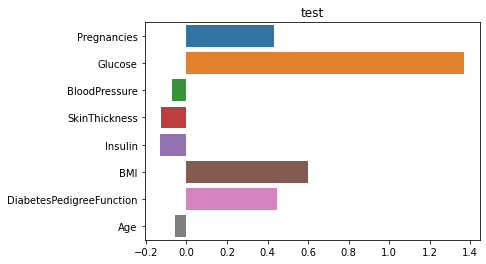

In [31]:
lr = LogisticRegression()
lr.fit(x_train_norm, y_train)
y_pred = lr.predict(x_test)
score_6 = lr.score(x_test, y_test)
prob_6 = lr.predict_proba(x_test)
roc_6 = roc_auc_score(y_test, prob_6[:,1])

pl.title("test")
sns.barplot(x= lr.coef_.flatten(), y=varnames)
pl.show()


In [32]:
print('Score LogisticRegression = ', score_6)
print('Roc Auc Score LogisticRegression = ', roc_6)

Score LogisticRegression =  0.7750611246943765
Roc Auc Score LogisticRegression =  0.8367215976179475


In [33]:
res = {
'Model' : ['Logistic Regression'], 
'Score ': [score_6],
'Roc Auc Score ': [roc_6], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799
5,Logistic Regression,0.775061,0.836722


**LogisticRegression with GridSearchCV**

In [34]:
list_c = []
for i in range (1,100):
    list_c.append(i/10)
#print(list_c)    
parameters = {'C' : list_c}

lr = GridSearchCV(LogisticRegression(penalty='l1', solver = 'liblinear'), parameters)
lr.fit(x_train_norm, y_train)
print(lr.best_estimator_)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


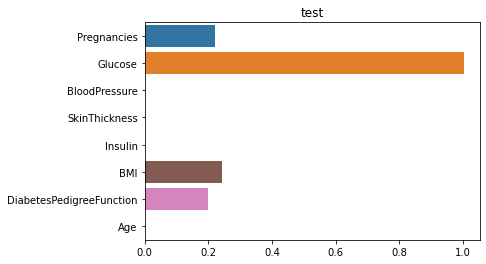

In [35]:
lr_p = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
lr_p.fit(x_train_norm, y_train)
y_pred = lr_p.predict(x_test)
score_7 = lr_p.score(x_test, y_test)
prob_7 = lr_p.predict_proba(x_test)
roc_7 = roc_auc_score(y_test, prob_7[:,1])

pl.title("test")
sns.barplot(x= lr_p.coef_.flatten(), y=varnames)
pl.show()

In [36]:
print('Score LogisReg with best param GridSearchCV = ', score_7)
print('Roc Auc Score LogisReg with best param GridSearchCV = ', roc_7)

Score LogisReg with best param GridSearchCV =  0.7555012224938875
Roc Auc Score LogisReg with best param GridSearchCV =  0.8235022331741875


In [37]:
res = {
'Model' : ['Logistic Regression Best C'], 
'Score ': [score_7],
'Roc Auc Score ': [roc_7], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799
5,Logistic Regression,0.775061,0.836722
6,Logistic Regression Best C,0.755501,0.823502


<div class="alert alert-block alert-success">
Interpretation
    
The model is sparse : We are lacking of coef for the blood pressure, skinThickness, Insulin and Age for this specific splitting of training/test data.
    The logistic Regression leads to better score and better RAScore. (the validation of it doesn't lead to better than default).

**What is the best decision method so far? Is the best model linear (LAD,LR) on quadratic (QDA,NB)?**

In [38]:
SCORE_sorted = SCORE.sort_values(by='Score ').reset_index()
SCORE_sorted['Model'][-1:]

6    Logistic Regression
Name: Model, dtype: object

In [39]:
SCORE_sorted = SCORE.sort_values(by='Roc Auc Score ').reset_index()
SCORE_sorted['Model'][-1:]

6    Logistic Regression
Name: Model, dtype: object

<div class="alert alert-block alert-success">
Discussion
    
    - By showing the SCORE table sorted by best Score : we have the best model for the Logistic Regression.
    
    - By showing the SCORE table sorted by Roc Auc Score : we have the best model for the Logistic Regression also.


**Interpret the separability of the sample in the predicted score space by plotting histograms for the
samples for each class in 1D.**


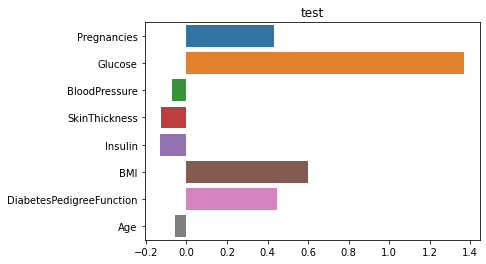

In [45]:
lr = LogisticRegression()
lr.fit(x_train_norm, y_train)
y_pred = lr.predict(x_test)
score_6 = lr.score(x_test, y_test)
prob_6 = lr.predict_proba(x_test)
roc_6 = roc_auc_score(y_test, prob_6[:,1])

pl.title("test")
sns.barplot(x= lr.coef_.flatten(), y=varnames)
pl.show()

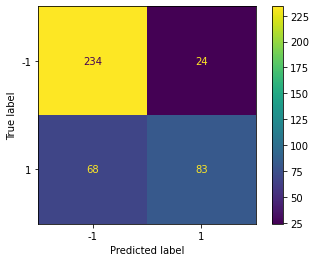

In [46]:
#In order to have a look of about the predicted values:
cm = confusion_matrix(y_test,y_pred, labels = qda_p.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot()
pl.show()

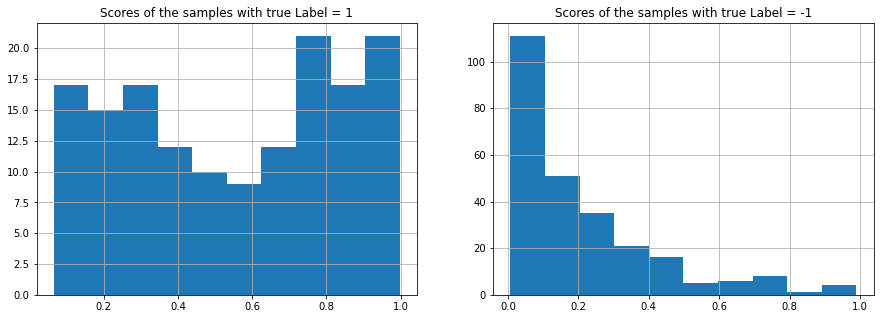

In [47]:
pl.figure(figsize = (15,5))
pl.subplot(121)
pl.title('Scores of the samples with true Label = 1')
pl.hist(prob_6[y_test == 1][:,1])
pl.grid(True)


pl.subplot(122)
pl.title('Scores of the samples with true Label = -1')
pl.hist(prob_6[y_test == -1][:,1])
pl.grid(True)

<div class="alert alert-block alert-success">
Discussion
    The diabetic class is far more difficult to separate than the non diabetic class.
    In the second figure, on our right, we can see that most of the population in on the left.
    In the first figure, it's more homogeneous.

**Interpret the weight for a good linear model. What is the effect of each variable on the risk of diabetes?
Does it make medical sense?**

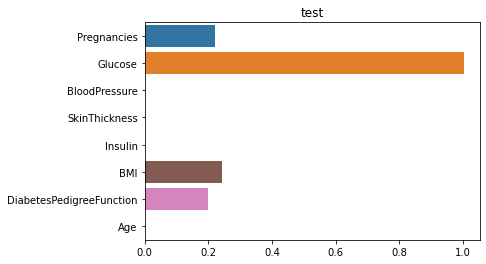

In [48]:
pl.title("test")
sns.barplot(x= lr_p.coef_.flatten(), y=varnames)
pl.show()

<div class="alert alert-block alert-success">
This was for the Logistic_Regression with best parameter:
    This plot can be interpreted like this:
    
    If you have a higher rate of glucosis than the average, then you have better chance to be diagnosed diabetic.

With this sparse model, we can suppose that with this linear model, the age, the Insulin the Bloodpressure and the SkinThickness doesn't seem to have an influence in our model, like those factors doesn't influence wether you are diabetic or not. 

## 2.3 Nonlinear methods

### RandomForestClassifier

In [49]:
rfc = RandomForestClassifier()
rfc.fit(x_train_norm, y_train)
y_pred = rfc.predict(x_test)
score = rfc.score(x_test, y_test)
prob = rfc.predict_proba(x_test)
roc = roc_auc_score(y_test, prob[:,1])

print('Score RandomForestClassifier = ', score)
print('Roc Auc Score RandomForestClassifier ',roc)

res = {
'Model' : ['RandomForestClassifier default'], 
'Score ': [score],
'Roc Auc Score ': [roc], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

Score RandomForestClassifier =  0.7383863080684596
Roc Auc Score RandomForestClassifier  0.8144026900764927


,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799
5,Logistic Regression,0.775061,0.836722
6,Logistic Regression Best C,0.755501,0.823502
7,RandomForestClassifier default,0.738386,0.814403


In [50]:
parameters = {'n_estimators': [100, 200, 400, 600],
               'max_depth': [10, 20, None],
               'min_samples_leaf': [1, 2, 4, 8]
              }
print("Looking for best parameters")
rfc= GridSearchCV(RandomForestClassifier(), parameters, cv=3, verbose=3)
rfc.fit(x_train, y_train.ravel())

Looking for best parameters
Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] max_depth=10, min_samples_leaf=1, n_estimators=100 ..............
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=100, score=0.720, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, n_estimators=100 ..............
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=100, score=0.790, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, n_estimators=100 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, n_estimators=100, score=0.720, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, n_estimators=200 ..............
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=200, score=0.720, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, n_estimators=200 ..............
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=200, score=0.790, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, n_estimators=200 ..............
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=200, score=0.740, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, n_estimators=400 ..............
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=400, score=0.750, total=   0.4s
[CV] max_depth=10, min_samples_leaf=1, n_estimators=400 ..............
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=400, score=0.810, total=   0.4s
[CV] max_depth=10, min_samples_leaf=1, n_estimators=400 ..............
[CV]  max_depth=10, min_samples_leaf=1, n_estimators=400, score=

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  1.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'n_estimators': [100, 200, 400, 600]},
             verbose=3)

In [144]:
best_rfc = rfc.best_estimator_
n_estimators = best_rfc.get_params()['n_estimators']
max_depth = best_rfc.get_params()['max_depth']
min_samples_leaf = best_rfc.get_params()['min_samples_leaf']

print('Best parameters are n_estimators = ', n_estimators, 'max_depth = ', max_depth , 'min_samples_leaf = ', min_samples_leaf)

Best parameters are n_estimators =  100 max_depth =  None min_samples_leaf =  4


In [145]:
rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
rfc.fit(x_train_norm, y_train)
y_pred = rfc.predict(x_test)
score = rfc.score(x_test, y_test)
prob = rfc.predict_proba(x_test)
roc = roc_auc_score(y_test, prob[:,1])

print('Score RandomForestClassifier = ', score)
print('Roc Auc Score RandomForestClassifier ',roc)

res = {
'Model' : ['RandomForestClassifier best param'], 
'Score ': [score],
'Roc Auc Score ': [roc], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

Score RandomForestClassifier =  0.7383863080684596
Roc Auc Score RandomForestClassifier  0.8089224292828174


,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799
5,Logistic Regression,0.775061,0.836722
6,Logistic Regression Best C,0.755501,0.823502
7,RandomForestClassifier default,0.740831,0.803352
8,RandomForestClassifier best param,0.738386,0.808922


<div class="alert alert-block alert-success">
For the RandomForest research, we can see that we don't have better performances.

### SVC

In [146]:
svc = SVC(probability=True)
svc.fit(x_train_norm, y_train)
y_pred = svc.predict(x_test)
score = svc.score(x_test, y_test)
prob = svc.predict_proba(x_test)
roc = roc_auc_score(y_test, prob[:,1])

print('Score SVC  = ', score)
print('Roc Auc Score SVC ',roc)

res = {
'Model' : ['SVC default'], 
'Score ': [score],
'Roc Auc Score ': [roc], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

Score SVC  =  0.7286063569682152
Roc Auc Score SVC  0.8264412957544021


,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799
5,Logistic Regression,0.775061,0.836722
6,Logistic Regression Best C,0.755501,0.823502
7,RandomForestClassifier default,0.740831,0.803352
8,RandomForestClassifier best param,0.738386,0.808922
9,SVC default,0.728606,0.826441


In [52]:
parameters = {'C': [0.1,1,5,10],
               'kernel': ['rbf','linear','poly']
              }

print("Looking for best parameters")
svc = GridSearchCV(SVC(), parameters, cv=3, verbose=3)
svc.fit(x_train, y_train.ravel())

Looking for best parameters
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.700, total=   0.1s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.690, total=   0.0s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.810, total=   0.1s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.740, total=   0.2s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.800, total=   0.1s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.760, total=   0.0s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.760, total=   0.0s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.760, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.730, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   34.4s finished


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [53]:
best_svc = svc.best_estimator_
C = best_svc.get_params()['C']
kernel = best_svc.get_params()['kernel']
print('Best parameters are C = ', C, 'kernel = ', kernel )

Best parameters are C =  10 kernel =  linear


In [54]:
svc = SVC(probability=True, C=C, kernel = kernel)
svc.fit(x_train_norm, y_train)
y_pred = svc.predict(x_test)
score = svc.score(x_test, y_test)
prob = svc.predict_proba(x_test)
roc = roc_auc_score(y_test, prob[:,1])

print('Score SVC  = ', score)
print('Roc Auc Score SVC ',roc)

res = {
'Model' : ['SVC best param'], 
'Score ': [score],
'Roc Auc Score ': [roc], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

Score SVC  =  0.7628361858190709
Roc Auc Score SVC  0.8320498998921916


,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799
5,Logistic Regression,0.775061,0.836722
6,Logistic Regression Best C,0.755501,0.823502
7,RandomForestClassifier default,0.738386,0.814403
8,SVC best param,0.762836,0.832050


<div class="alert alert-block alert-success">
For the SVC, with best param or not, we have a little lower scores than the LogReg which is our leader here.

### MLP Classifier

In [55]:
mlp = MLPClassifier()
mlp.fit(x_train_norm, y_train)
y_pred = mlp.predict(x_test)
score = mlp.score(x_test, y_test)
prob = mlp.predict_proba(x_test)
roc = roc_auc_score(y_test, prob[:,1])

print('Score MLP  = ', score)
print('Roc Auc Score MLP ',roc)

res = {
'Model' : ['MLP default'], 
'Score ': [score],
'Roc Auc Score ': [roc], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

Score MLP  =  0.7579462102689487
Roc Auc Score MLP  0.8380820370655577


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799
5,Logistic Regression,0.775061,0.836722
6,Logistic Regression Best C,0.755501,0.823502
7,RandomForestClassifier default,0.738386,0.814403
8,SVC best param,0.762836,0.832050
9,MLP default,0.757946,0.838082


In [56]:
parameters = {'activation': ['logistic','tanh','relu'],
               'solver': ['lbfgs', 'sgd', 'adam']
              }

print("Looking for best parameters")
mlp= GridSearchCV(MLPClassifier(), parameters, cv=3, verbose=3)
mlp.fit(x_train, y_train.ravel())

Looking for best parameters
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] activation=logistic, solver=lbfgs ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.

[CV] ..... activation=logistic, solver=lbfgs, score=nan, total=   0.2s
[CV] activation=logistic, solver=lbfgs ...............................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\optimi

[CV] ..... activation=logistic, solver=lbfgs, score=nan, total=   0.2s
[CV] activation=logistic, solver=lbfgs ...............................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\optimi

[CV] ..... activation=logistic, solver=lbfgs, score=nan, total=   0.2s
[CV] activation=logistic, solver=sgd .................................
[CV] ..... activation=logistic, solver=sgd, score=0.690, total=   0.2s
[CV] activation=logistic, solver=sgd .................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=logistic, solver=sgd, score=0.700, total=   0.2s
[CV] activation=logistic, solver=sgd .................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=logistic, solver=sgd, score=0.690, total=   0.3s
[CV] activation=logistic, solver=adam ................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .... activation=logistic, solver=adam, score=0.700, total=   0.3s
[CV] activation=logistic, solver=adam ................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .... activation=logistic, solver=adam, score=0.690, total=   0.2s
[CV] activation=logistic, solver=adam ................................
[CV] .... activation=logistic, solver=adam, score=0.740, total=   0.2s
[CV] activation=tanh, solver=lbfgs ...................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\optimi

[CV] ......... activation=tanh, solver=lbfgs, score=nan, total=   0.3s
[CV] activation=tanh, solver=lbfgs ...................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\optimi

[CV] ......... activation=tanh, solver=lbfgs, score=nan, total=   0.3s
[CV] activation=tanh, solver=lbfgs ...................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\optimi

[CV] ......... activation=tanh, solver=lbfgs, score=nan, total=   0.3s
[CV] activation=tanh, solver=sgd .....................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ......... activation=tanh, solver=sgd, score=0.660, total=   0.3s
[CV] activation=tanh, solver=sgd .....................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ......... activation=tanh, solver=sgd, score=0.700, total=   0.3s
[CV] activation=tanh, solver=sgd .....................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ......... activation=tanh, solver=sgd, score=0.700, total=   0.3s
[CV] activation=tanh, solver=adam ....................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ........ activation=tanh, solver=adam, score=0.670, total=   0.3s
[CV] activation=tanh, solver=adam ....................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ........ activation=tanh, solver=adam, score=0.690, total=   0.3s
[CV] activation=tanh, solver=adam ....................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ........ activation=tanh, solver=adam, score=0.720, total=   0.3s
[CV] activation=relu, solver=lbfgs ...................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\optimi

[CV] ......... activation=relu, solver=lbfgs, score=nan, total=   0.3s
[CV] activation=relu, solver=lbfgs ...................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\optimi

[CV] ......... activation=relu, solver=lbfgs, score=nan, total=   0.5s
[CV] activation=relu, solver=lbfgs ...................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\optimi

[CV] ......... activation=relu, solver=lbfgs, score=nan, total=   0.4s
[CV] activation=relu, solver=sgd .....................................
[CV] ......... activation=relu, solver=sgd, score=0.700, total=   0.0s
[CV] activation=relu, solver=sgd .....................................
[CV] ......... activation=relu, solver=sgd, score=0.650, total=   0.1s
[CV] activation=relu, solver=sgd .....................................
[CV] ......... activation=relu, solver=sgd, score=0.700, total=   0.2s
[CV] activation=relu, solver=adam ....................................
[CV] ........ activation=relu, solver=adam, score=0.680, total=   0.0s
[CV] activation=relu, solver=adam ....................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.3s finished


[CV] ........ activation=relu, solver=adam, score=0.610, total=   0.3s
[CV] activation=relu, solver=adam ....................................
[CV] ........ activation=relu, solver=adam, score=0.620, total=   0.1s


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=3)

In [57]:
best_mlp = mlp.best_estimator_
activation = best_mlp.get_params()['activation']
solver = best_mlp.get_params()['solver']
print('Best parameters are activation  = ', activation , 'solver = ', solver )

Best parameters are activation  =  logistic solver =  adam


In [58]:
mlp = MLPClassifier(activation = 'logistic', solver = 'adam')
mlp.fit(x_train_norm, y_train)
y_pred = mlp.predict(x_test)
score = mlp.score(x_test, y_test)
prob = mlp.predict_proba(x_test)
roc = roc_auc_score(y_test, prob[:,1])

print('Score MLP best param  = ', score)
print('Roc Auc Score MLP best param',roc)

res = {
'Model' : ['MLP Best param'], 
'Score ': [score],
'Roc Auc Score ': [roc], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

Score MLP best param  =  0.7652811735941321
Roc Auc Score MLP best param 0.8372349709944042


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799
5,Logistic Regression,0.775061,0.836722
6,Logistic Regression Best C,0.755501,0.823502
7,RandomForestClassifier default,0.738386,0.814403
8,SVC best param,0.762836,0.832050
9,MLP default,0.757946,0.838082


<div class="alert alert-block alert-success">
For the MLP, by default we have the best RAScore, but it doesn't beat the logreg for the score. The best parameter MLP doesn't lead to better performance than LOG REG.

### GradientBoostingClassifier 

In [59]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_norm, y_train)
y_pred = gbc.predict(x_test)
score = gbc.score(x_test, y_test)
prob = gbc.predict_proba(x_test)
roc = roc_auc_score(y_test, prob[:,1])

print('Score Grad Boost Classifier  = ', score)
print('Roc Auc Score Grad Boost Classifier',roc)

res = {
'Model' : ['Grad Boost Classifier'], 
'Score ': [score],
'Roc Auc Score ': [roc], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

Score Grad Boost Classifier  =  0.7383863080684596
Roc Auc Score Grad Boost Classifier 0.7985009497407466


,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799
5,Logistic Regression,0.775061,0.836722
6,Logistic Regression Best C,0.755501,0.823502
7,RandomForestClassifier default,0.738386,0.814403
8,SVC best param,0.762836,0.832050
9,MLP default,0.757946,0.838082


In [60]:
parameters = {'loss': ['deviance','exponential'],
              'n_estimators': [100, 200, 400, 600]
              }

print("Looking for best parameters")
gbc = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, verbose=3)
gbc.fit(x_train, y_train.ravel())

Looking for best parameters
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] loss=deviance, n_estimators=100 .................................
[CV] ..... loss=deviance, n_estimators=100, score=0.720, total=   0.1s
[CV] loss=deviance, n_estimators=100 .................................
[CV] ..... loss=deviance, n_estimators=100, score=0.760, total=   0.1s
[CV] loss=deviance, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ..... loss=deviance, n_estimators=100, score=0.720, total=   0.1s
[CV] loss=deviance, n_estimators=200 .................................
[CV] ..... loss=deviance, n_estimators=200, score=0.750, total=   0.1s
[CV] loss=deviance, n_estimators=200 .................................
[CV] ..... loss=deviance, n_estimators=200, score=0.780, total=   0.1s
[CV] loss=deviance, n_estimators=200 .................................
[CV] ..... loss=deviance, n_estimators=200, score=0.720, total=   0.1s
[CV] loss=deviance, n_estimators=400 .................................
[CV] ..... loss=deviance, n_estimators=400, score=0.710, total=   0.3s
[CV] loss=deviance, n_estimators=400 .................................
[CV] ..... loss=deviance, n_estimators=400, score=0.780, total=   0.3s
[CV] loss=deviance, n_estimators=400 .................................
[CV] ..... loss=deviance, n_estimators=400, score=0.700, total=   0.4s
[CV] loss=deviance, n_estimators=600 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    6.7s finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 200, 400, 600]},
             verbose=3)

In [61]:
best_gbc = gbc.best_estimator_
n_estimators = best_gbc.get_params()['n_estimators']
loss = best_gbc.get_params()['loss']
print('Best parameters are n_estimators  = ', n_estimators , 'and loss = ', loss )

Best parameters are n_estimators  =  200 and loss =  deviance


In [62]:
gbc = GradientBoostingClassifier(n_estimators = n_estimators, loss=loss)
gbc.fit(x_train_norm, y_train)
y_pred = gbc.predict(x_test)
score = gbc.score(x_test, y_test)
prob = gbc.predict_proba(x_test)
roc = roc_auc_score(y_test, prob[:,1])

print('Score GBC best param  = ', score)
print('Roc Auc Score GBC best param',roc)

res = {
'Model' : ['Gradient Boosting Best param'], 
'Score ': [score],
'Roc Auc Score ': [roc], 
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

Score GBC best param  =  0.7286063569682152
Roc Auc Score GBC best param 0.7955747214949433


,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799
5,Logistic Regression,0.775061,0.836722
6,Logistic Regression Best C,0.755501,0.823502
7,RandomForestClassifier default,0.738386,0.814403
8,SVC best param,0.762836,0.832050
9,MLP default,0.757946,0.838082


**Can you find a better performance?**

<div class="alert alert-block alert-success">
    It seems that the Grad Boosting doesn't lead to better performance.
Let's look at each following questions bellow.

### 2.4 Comparison and interpretation

In [63]:
SCORE

,Model,Score,Roc Auc Score
0,LDA,0.762836,0.831973
1,LDA best shrinkage,0.760391,0.834796
2,QDA default,0.767726,0.819857
3,QDA best reg_param,0.743276,0.831537
4,Gaussian NB default,0.748166,0.813799
5,Logistic Regression,0.775061,0.836722
6,Logistic Regression Best C,0.755501,0.823502
7,RandomForestClassifier default,0.738386,0.814403
8,SVC best param,0.762836,0.832050
9,MLP default,0.757946,0.838082


In [64]:
SCORE_sorted = SCORE.sort_values(by='Score ').reset_index()
SCORE_sorted['Model'][-1:]

12    Logistic Regression
Name: Model, dtype: object

In [65]:
SCORE_sorted_2 = SCORE.sort_values(by='Roc Auc Score ').reset_index()
SCORE_sorted_2['Model'][-1:]

12    MLP default
Name: Model, dtype: object

**• Collect the test performances for all methods investigated above in a table (in a dataframe and printing
it for instance). Which methods work the best in practice?**

<div class="alert alert-block alert-success">

According to our table of Score, 
The accuracy is the best for the Logistic regression, and LogReg has the second place for the RAScore.
The best place for the RAScore is for the MLP default.
In practice, the logistic regression works the best


**• Which model is best from a medical/practical perspective? Do we need non-linearity in this application?**

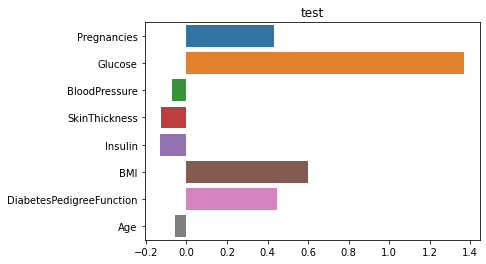

In [66]:
lr = LogisticRegression()
lr.fit(x_train_norm, y_train)
y_pred = lr.predict(x_test)
score_6 = lr.score(x_test, y_test)
prob_6 = lr.predict_proba(x_test)
roc_6 = roc_auc_score(y_test, prob_6[:,1])

pl.title("test")
sns.barplot(x= lr.coef_.flatten(), y=varnames)
pl.show()

<div class="alert alert-block alert-success">
    The best model here is the Logistic Regression which is not a non-linearity model.
    I also think that from a medical perspective, it is a good model to understand which are the most important features for the Doctor to understand the disease.

**• For the best model, compute the confusion matrix for the test data. What is the false negative rate
(FNR) (FN/(FN+TP)) for this classifier? Is it good for this kind of applications?**

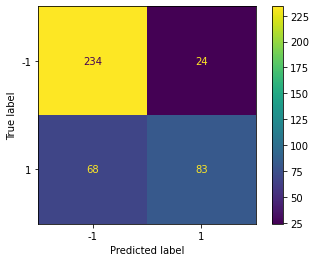

In [67]:
cm = confusion_matrix(y_test,y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot()
pl.show()

In [68]:
cm
fn = cm[1][0]
tp = cm[1][1]
fnr = fn/(fn + tp)
print('The false negative rate is equal to', fnr)

The false negative rate is equal to 0.4503311258278146


<div class="alert alert-block alert-success">
The False Negative rate is almost equal to 45%
It is not good for those medical application, because it could be very harmful not to treat this.

**• Since a false negative can have an important medical impact, propose a new threshold for the predicted
score that leads to a FNR of less that 10% (this can be done by changing manually the value of the
intercept_ in the trained classifier).**


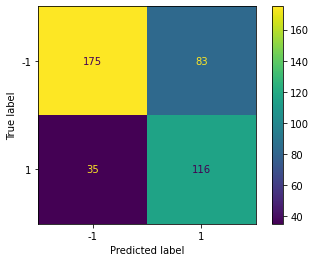

The false negative rate is equal to 0.23178807947019867


In [71]:
lr = LogisticRegression(solver='liblinear',intercept_scaling = 0.001 )
#lr = LogisticRegression()
lr.fit(x_train_norm, y_train)
y_pred = lr.predict(x_test)
score_6 = lr.score(x_test, y_test)
prob_6 = lr.predict_proba(x_test)
roc_6 = roc_auc_score(y_test, prob_6[:,1])

# pl.title("test")
# sns.barplot(x= lr.coef_.flatten(), y=varnames)
# pl.show()

cm = confusion_matrix(y_test,y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot()
pl.show()

cm
fn = cm[1][0]
tp = cm[1][1]
fnr = fn/(fn + tp)
print('The false negative rate is equal to', fnr)

<div class="alert alert-block alert-success">
The False Negative rate is almost equal to 23%
I manage to have it almost divided by 2, however it is still not under the 10 % as expected...

## 3 Predicting Classes on the Digits dataset

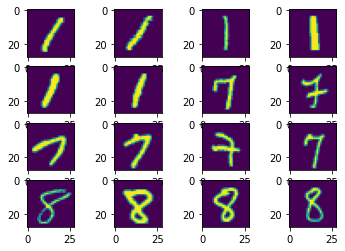

In [178]:
# pre-processing

# xx = x.reshape((len(x), 28, 28))
# xxt = xt.reshape((len(xt), 28, 28))
for i in range(16):
    pl.subplot(4, 4, i+1)
    pl.imshow(xx[i*180])

LogisticRegression,SVC,MLPClassifier


### LinearDiscriminantAnalysis

In [92]:
lda = LinearDiscriminantAnalysis()
lda.fit(x, y.ravel())
y_pred = lda.predict(xt)
score = lda.score(xt, yt)
prob = lda.predict_proba(xt)
roc = roc_auc_score(yt, prob, multi_class = 'ovr')


score, roc

(0.9333333333333333, 0.9816526666666666)

In [93]:
columns = ['Model', 'Score ', 'ROC']
Score = pd.DataFrame(columns=columns)

res = {
'Model' : ['LDA'], 
'Score ': [score],
'ROC'  : [roc]
}
to_join = pd.DataFrame(res)
Score = pd.concat([Score, to_join], ignore_index = True)
Score

,Model,Score,ROC
0,LDA,0.933333,0.981653


In [76]:
list_shri = []
for i in range (1,100):
    list_shri.append(i/100)
#print(list_shri)

parameters = {'shrinkage' : list_shri}
#print(parameters)
#print(clf.get_params().keys())

lda2 = GridSearchCV(LinearDiscriminantAnalysis(solver = 'eigen'), parameters)
lda2.fit(x,y.ravel())
print(lda2.best_estimator_)



LinearDiscriminantAnalysis(shrinkage=0.57, solver='eigen')


In [94]:
lda_p = LinearDiscriminantAnalysis(shrinkage=0.57, solver='eigen')
lda_p.fit(x,y.ravel())
y_pred = lda_p.predict(xt)
score = lda_p.score(xt, yt)
prob = lda_p.predict_proba(xt)
roc = roc_auc_score(yt, prob, multi_class = 'ovr')
score, roc

(0.9433333333333334, 0.9923926666666668)

In [95]:
res = {
'Model' : ['LDA best'], 
'Score ': [score],
'ROC' : [roc]
}
to_join = pd.DataFrame(res)
Score = pd.concat([Score, to_join], ignore_index = True)
Score

,Model,Score,ROC
0,LDA,0.933333,0.981653
1,LDA best,0.943333,0.992393


### Logistic Regression

In [96]:
y_train = y.ravel() 

In [97]:
lr = LogisticRegression(multi_class='ovr', solver= 'liblinear')
lr.fit(x, y_train)
y_pred = lr.predict(xt)
score = lr.score(xt, yt)
prob = lr.predict_proba(xt)
roc = roc_auc_score(yt, prob, multi_class = 'ovr')
score, roc

(0.9653333333333334, 0.9945066666666666)

In [98]:
res = {
'Model' : ['Logistique Regression'], 
'Score ': [score],
'ROC' : [roc]
}
to_join = pd.DataFrame(res)
Score = pd.concat([Score, to_join], ignore_index = True)
Score

,Model,Score,ROC
0,LDA,0.933333,0.981653
1,LDA best,0.943333,0.992393
2,Logistique Regression,0.965333,0.994507


In [100]:
list_c = []
for i in range (1,100):
    list_c.append(i/10)
#print(list_c)    
parameters = {'C' : list_c}

lr = GridSearchCV(LogisticRegression(penalty='l1', solver = 'liblinear'), parameters)
lr.fit(x, y_train)
print(lr.best_estimator_)

C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

LogisticRegression(C=0.4, penalty='l1', solver='liblinear')


In [102]:
lr = LogisticRegression(C=0.4, penalty='l1', solver='liblinear')
lr.fit(x, y_train)
y_pred = lr.predict(xt)
score = lr.score(xt, yt)
prob = lr.predict_proba(xt)
roc = roc_auc_score(yt, prob, multi_class = 'ovr')
score, roc
# pl.title("test")
# sns.barplot(x= lr_p.coef_.flatten(), y=varnames)
# pl.show()

(0.9653333333333334, 0.9959899999999999)

In [103]:
res = {
'Model' : ['Logistique Regression best param'], 
'Score ': [score],
'ROC' : [roc]
}
to_join = pd.DataFrame(res)
Score = pd.concat([Score, to_join], ignore_index = True)
Score

,Model,Score,ROC
0,LDA,0.933333,0.981653
1,LDA best,0.943333,0.992393
2,Logistique Regression,0.965333,0.994507
3,Logistique Regression best param,0.965333,0.995990


### SVC

In [104]:
svc = SVC(probability=True)
svc.fit(x, y.ravel())
y_pred = svc.predict(xt)
score = svc.score(xt, yt)
prob = svc.predict_proba(xt)
roc = roc_auc_score(yt, prob, multi_class = 'ovr')

res = {
'Model' : ['SVC default'], 
'Score ': [score],
'ROC'   : [roc]
}
to_join = pd.DataFrame(res)
Score = pd.concat([Score, to_join], ignore_index = True)
Score

,Model,Score,ROC
0,LDA,0.933333,0.981653
1,LDA best,0.943333,0.992393
2,Logistique Regression,0.965333,0.994507
3,Logistique Regression best param,0.965333,0.995990
4,SVC default,0.976000,0.998409


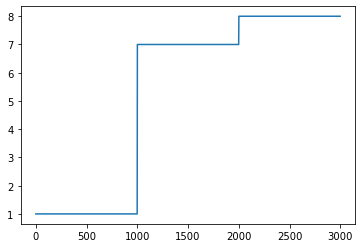

In [105]:
pl.plot(y)

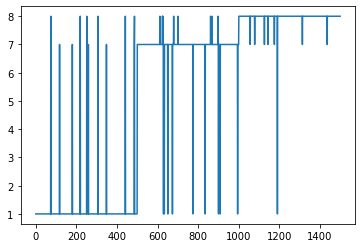

In [106]:
pl.plot(y_pred)

In [107]:
parameters = {'C': [0.1,1,5,10],
               'kernel': ['rbf','linear','poly']
              }

print("Looking for best parameters")
svc= GridSearchCV(SVC(), parameters, cv=3, verbose=3)
svc.fit(x, y.ravel())

Looking for best parameters
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.1, kernel=rbf, score=0.936, total=   4.8s
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] ................... C=0.1, kernel=rbf, score=0.951, total=   2.4s
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.1s remaining:    0.0s


[CV] ................... C=0.1, kernel=rbf, score=0.939, total=   2.4s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.974, total=   0.5s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.970, total=   0.6s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.961, total=   0.5s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.564, total=   7.9s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.602, total=   4.6s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.536, total=   5.8s
[CV] C=1, kernel=rbf .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [108]:
best_svc = svc.best_estimator_
kernel = best_svc.get_params()['kernel']
C = best_svc.get_params()['C']

print('Best parameters are C = ', C, 'kernel = ', kernel)

Best parameters are C =  10 kernel =  poly


In [109]:
svc = SVC(probability=True, C=C, kernel = kernel)
svc.fit(x, y.ravel())
y_pred = svc.predict(xt)
score = svc.score(xt, yt)
prob = svc.predict_proba(xt)
roc = roc_auc_score(yt, prob, multi_class = 'ovr')

res = {
'Model' : ['SVC Best param'], 
'Score ': [score],
'ROC'   : [roc]
}

to_join = pd.DataFrame(res)
Score = pd.concat([Score, to_join], ignore_index = True)
Score

,Model,Score,ROC
0,LDA,0.933333,0.981653
1,LDA best,0.943333,0.992393
2,Logistique Regression,0.965333,0.994507
3,Logistique Regression best param,0.965333,0.995990
4,SVC default,0.976000,0.998409
5,SVC Best param,0.979333,0.995205


### MLP CLassifier

In [110]:
mlp = MLPClassifier()
mlp.fit(x, y.ravel())
y_pred = mlp.predict(xt)
score = mlp.score(xt, yt)
prob = mlp.predict_proba(xt)
roc = roc_auc_score(yt, prob, multi_class = 'ovr')

res = {
'Model' : ['MLP'], 
'Score ': [score],
'ROC'   : [roc]
}

to_join = pd.DataFrame(res)
Score = pd.concat([Score, to_join], ignore_index = True)
Score

,Model,Score,ROC
0,LDA,0.933333,0.981653
1,LDA best,0.943333,0.992393
2,Logistique Regression,0.965333,0.994507
3,Logistique Regression best param,0.965333,0.995990
4,SVC default,0.976000,0.998409
5,SVC Best param,0.979333,0.995205
6,MLP,0.975333,0.994959


In [111]:
parameters = {'activation': ['logistic','tanh','relu'],
               'solver': ['lbfgs', 'sgd', 'adam']
              }

print("Looking for best parameters")
mlp= GridSearchCV(MLPClassifier(), parameters, cv=3, verbose=3)
mlp.fit(x, y.ravel())

Looking for best parameters
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] activation=logistic, solver=lbfgs ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... activation=logistic, solver=lbfgs, score=0.977, total=   1.0s
[CV] activation=logistic, solver=lbfgs ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ... activation=logistic, solver=lbfgs, score=0.975, total=   0.6s
[CV] activation=logistic, solver=lbfgs ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ... activation=logistic, solver=lbfgs, score=0.963, total=   0.6s
[CV] activation=logistic, solver=sgd .................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=logistic, solver=sgd, score=0.973, total=   7.8s
[CV] activation=logistic, solver=sgd .................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=logistic, solver=sgd, score=0.976, total=   8.3s
[CV] activation=logistic, solver=sgd .................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=logistic, solver=sgd, score=0.962, total=   7.0s
[CV] activation=logistic, solver=adam ................................
[CV] .... activation=logistic, solver=adam, score=0.979, total=   3.5s
[CV] activation=logistic, solver=adam ................................
[CV] .... activation=logistic, solver=adam, score=0.969, total=   4.0s
[CV] activation=logistic, solver=adam ................................
[CV] .... activation=logistic, solver=adam, score=0.963, total=   3.6s
[CV] activation=tanh, solver=lbfgs ...................................
[CV] ....... activation=tanh, solver=lbfgs, score=0.981, total=   0.5s
[CV] activation=tanh, solver=lbfgs ...................................
[CV] ....... activation=tanh, solver=lbfgs, score=0.975, total=   0.6s
[CV] activation=tanh, solver=lbfgs ...................................
[CV] ....... activation=tanh, solver=lbfgs, score=0.966, total=   0.7s
[CV] activation=tanh, solver=sgd .....................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ......... activation=tanh, solver=sgd, score=0.975, total=   8.6s
[CV] activation=tanh, solver=sgd .....................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ......... activation=tanh, solver=sgd, score=0.973, total=   8.1s
[CV] activation=tanh, solver=sgd .....................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ......... activation=tanh, solver=sgd, score=0.965, total=   8.1s
[CV] activation=tanh, solver=adam ....................................
[CV] ........ activation=tanh, solver=adam, score=0.969, total=   1.8s
[CV] activation=tanh, solver=adam ....................................
[CV] ........ activation=tanh, solver=adam, score=0.972, total=   1.9s
[CV] activation=tanh, solver=adam ....................................
[CV] ........ activation=tanh, solver=adam, score=0.958, total=   2.2s
[CV] activation=relu, solver=lbfgs ...................................
[CV] ....... activation=relu, solver=lbfgs, score=0.978, total=   0.6s
[CV] activation=relu, solver=lbfgs ...................................
[CV] ....... activation=relu, solver=lbfgs, score=0.973, total=   0.5s
[CV] activation=relu, solver=lbfgs ...................................
[CV] ....... activation=relu, solver=lbfgs, score=0.972, total=   0.8s
[CV] activation=relu, solver=sgd .....................................


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ......... activation=relu, solver=sgd, score=0.979, total=   8.7s
[CV] activation=relu, solver=sgd .....................................
[CV] ......... activation=relu, solver=sgd, score=0.978, total=   8.3s
[CV] activation=relu, solver=sgd .....................................
[CV] ......... activation=relu, solver=sgd, score=0.975, total=   7.3s
[CV] activation=relu, solver=adam ....................................
[CV] ........ activation=relu, solver=adam, score=0.977, total=   2.3s
[CV] activation=relu, solver=adam ....................................
[CV] ........ activation=relu, solver=adam, score=0.976, total=   1.8s
[CV] activation=relu, solver=adam ....................................
[CV] ........ activation=relu, solver=adam, score=0.978, total=   1.8s


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.7min finished


GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=3)

In [112]:
best_mlp = mlp.best_estimator_
activation = best_mlp.get_params()['activation']
solver = best_mlp.get_params()['solver']
print('Best parameters are activation  = ', activation , 'solver = ', solver )

Best parameters are activation  =  relu solver =  sgd


In [113]:
mlp = MLPClassifier(activation=activation, solver=solver)
mlp.fit(x, y.ravel())
y_pred = mlp.predict(xt)
score = mlp.score(xt, yt)
prob = mlp.predict_proba(xt)
roc = roc_auc_score(yt, prob, multi_class = 'ovr')


res = {
'Model' : ['MLP Best'], 
'Score ': [score],
'ROC'   : [roc]
}
to_join = pd.DataFrame(res)
Score = pd.concat([Score, to_join], ignore_index = True)
Score

,Model,Score,ROC
0,LDA,0.933333,0.981653
1,LDA best,0.943333,0.992393
2,Logistique Regression,0.965333,0.994507
3,Logistique Regression best param,0.965333,0.995990
4,SVC default,0.976000,0.998409
5,SVC Best param,0.979333,0.995205
6,MLP,0.975333,0.994959
7,MLP Best,0.968000,0.991589


### 3.2 Interpreting the classifier

**• Compare the performances of the different methods (with different metrics). Which model is the best
on test data?**

In [114]:
Score_sorted = Score.sort_values(by='Score ').reset_index()
Score_sorted['Model'][-1:]

7    SVC Best param
Name: Model, dtype: object

In [115]:
Score_sorted = Score.sort_values(by='ROC').reset_index()
Score_sorted['Model'][-1:]

7    SVC default
Name: Model, dtype: object

<div class="alert alert-block alert-success">
SVC seems to be the best classifier here.
I don't know how to choose exactly to decide wether the best is with optimized parameter or not.
I think that as long as the ROC is almost equal to 1 for both (0.99++) , I will keep the one with the best score: 
The SVC Best Param.

**• Select the best classifier from the previous section and use it to predict labels on the test data.**


In [117]:
svc = SVC(probability=True, C=C, kernel = kernel)
svc.fit(x, y.ravel())
y_pred = svc.predict(xt)
score = svc.score(xt, yt)
prob = svc.predict_proba(xt)
roc = roc_auc_score(yt, prob, multi_class = 'ovr')

• Compute the confusion matrix and interpret the errors made by the classifier. What is the class that
is the most difficult to recognize? Are there somme classes that are harder to discriminate?


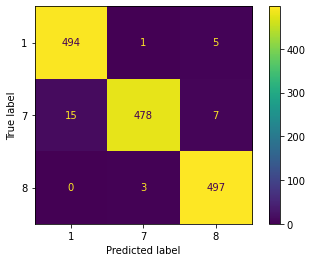

In [119]:
cm = confusion_matrix(yt,y_pred, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svc.classes_)
disp.plot()
pl.show()

# cm
# fn = cm[1][0]
# tp = cm[1][1]
# fnr = fn/(fn + tp)
# print('The false negative rate is equal to', fnr)

<div class="alert alert-block alert-success">
The class that is the most difficult to recognize is the second class for the number: 7.
There are 15+7 = 22 misclassified pictures, where for the first class, 1 : there are 6 missclassified, and for the third class: 8 , there are 3 missclassified.

• Plot some of the sample that are miss-classified. Are they difficult to recognize ? Why did the classifier
fail to recognize them?

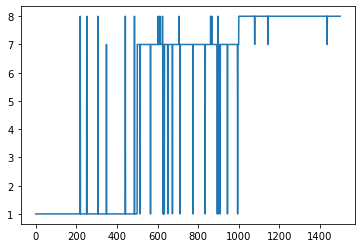

In [120]:
pl.plot(y_pred)

In [150]:
y_pred[705:710]


array([8, 7, 7, 7, 7], dtype=uint8)

**I looked for misclassified data in our y_pred, 
we conclude that the 219th element is misclassified, as the 251, 705 and 1435.** 

In [175]:
print(y_pred[219], 'instead of', y_pred[220],'and',y_pred[251],'instead of',  y_pred[252],'and',y_pred[705],'instead of',y_pred[706], 'and', y_pred[1435],'instead of', y_pred[1436])

8 instead of 1 and 8 instead of 1 and 8 instead of 7 and 7 instead of 8


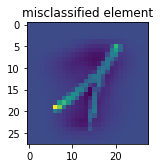

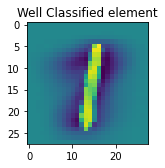

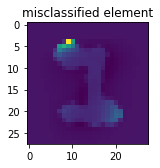

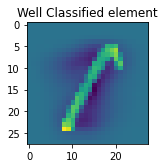

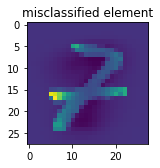

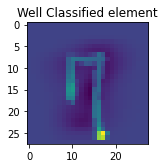

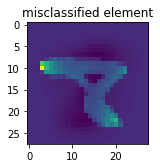

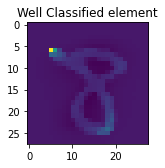

In [177]:
mis_clas=[219,251,705,1435]
K = len(mis_clas)
for i in range(K):
    pl.figure(figsize = (10,10))
    pl.subplot(1, K, i+1)
    pl.imshow(xt[mis_clas[i]].reshape(28,28))
    pl.title('misclassified element')
    pl.figure(figsize = (10,10))
    pl.subplot(1, K, i+1)
    pl.imshow(xt[mis_clas[i]+1].reshape(28,28))
    pl.title('Well Classified element')
pl.show()

<div class="alert alert-block alert-success">
Hence we can confirm that when the element is misclassified, it is because there was an "exotic" draw of the digits. 
By exotic I mean the draw is anormal compared to the common draws, Or with human eyes, "look like" 


**• Pick a well classified sample and create 1000 noisy samples of it by adding gaussian noise (np.random.
randn). Pick a level of noise that allows you to still distinguish clearly the class. Compute the accuracy
of the classifier on those 1000 noisy samples. If the accuracy is 1, increase the noise level or choose
another well classified sample.**

We saw that the 220 th element is well classified (y_pred[220] = 1)

**• How robust is the classifier? Visualise some of those "adversarial" examples when the accuracy on the
noisy samples is not 1.**


### Bonus: Convolutional Neural network (CNN)
Implement a CNN and train it on the data (you will need to reshape it to store it as images). Investigate
te performance of the CNN when varying its parameters. Does it have better performance than the model
above? Is it more robust to adversarial examples?.

In [236]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
print(tf.keras.__version__)

2.4.0


In [237]:
xx.shape, xt.shape, y.shape, yt.shape

((3000, 28, 28), (1500, 784), (3000, 1), (1500, 1))

In [244]:
img_rows, img_cols, nb_channels = xx.shape[1], xx.shape[2], 1
X_train = xx.reshape(xx.shape[0], img_rows, img_cols, nb_channels)
X_test = xt.reshape(xt.shape[0], img_rows, img_cols, nb_channels)
#print(X_train.shape, X_train)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#With that, I am going to put each digit in classes: the class 0 for the number 1, the class 1 for the digit 7, the class 3 for the digit 8
y_train = []
for el in y:
    if el == 1:
        y_train.append(0)
    elif el == 7:
        y_train.append(1)
    else:
        y_train.append(2)
    
y_test = []       
for el in yt:
    if el == 1:
        y_test.append(0)
    elif el == 7:
        y_test.append(1)
    else:
        y_test.append(2)

Y_train = to_categorical(y_train, num_classes=3)
print(Y_train.shape)
Y_test = to_categorical(y_test, num_classes=3)
# Y_train = []
# for el in y:
#     if el == 1:
#         Y_train.append([1.0, 0.0, 0.0])
#     elif el == 7:
#         Y_train.append([0.0, 1.0, 0.0])
#     Y_train.append([0.0, 0.0, 1.0])

#     Y_test = []
# for el in yt:
#     if el == 1:
#         Y_train.append([1.0, 0.0, 0.0])
#     elif el == 7:
#         Y_train.append([0.0, 1.0, 0.0])
#     Y_train.append([0.0, 0.0, 1.0])

nb_classes = Y_train.shape[1]

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape, Y_train)
print('There are {} train data'.format(X_train.shape[0]))
print('There are {} test data'.format(X_test.shape[0]))
print(img_rows, img_cols, nb_channels)

(3000, 3)
X_train shape: (3000, 28, 28, 1)
Y_train shape: (3000, 3) [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
There are 3000 train data
There are 1500 test data
28 28 1


In [245]:
learning_rate = 0.01
n_epochs = 10
batch_size = 64
nb_channels = 1
# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)

# --- Size of the successive layers
n_h_0 = nb_channels  # number of input channels
n_h_1 = nb_filters
n_h_2 = nb_filters

In [246]:

model = Sequential()
model.add(Conv2D(filters=n_h_1, kernel_size=kernel_size, name='Conv1', strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=n_h_2, kernel_size=kernel_size, name='Conv2', strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))


In [247]:
# compile, train and evaluate model

model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=n_epochs, batch_size=batch_size)
model.summary()


score = model.evaluate(X_test, Y_test, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
47/47 [==============================] - 4s 78ms/step - loss: 0.3421 - accuracy: 0.8405
Epoch 2/10
47/47 [==============================] - 4s 82ms/step - loss: 0.0576 - accuracy: 0.9864
Epoch 3/10
47/47 [==============================] - 4s 83ms/step - loss: 0.0309 - accuracy: 0.9900
Epoch 4/10
47/47 [==============================] - 4s 78ms/step - loss: 0.0197 - accuracy: 0.9943
Epoch 5/10
47/47 [==============================] - 4s 77ms/step - loss: 0.0356 - accuracy: 0.9912
Epoch 6/10
47/47 [==============================] - 3s 67ms/step - loss: 0.0148 - accuracy: 0.9952
Epoch 7/10
47/47 [==============================] - 3s 70ms/step - loss: 0.0042 - accuracy: 0.9994
Epoch 8/10
47/47 [==============================] - 3s 66ms/step - loss: 0.0037 - accuracy: 0.9987
Epoch 9/10
47/47 [==============================] - 3s 66ms/step - loss: 0.0058 - accuracy: 0.9994
Epoch 10/10
47/47 [==============================] - 3s 69ms/step - loss: 0.0012 - accuracy: 0.9997
Model: "s

After some modification, and by modifying my parameter,  
I didn't manage to have a good Test accuracy.
However, my CNN is working even if I don't have good remarquable results.

**The End**

<div class="alert alert-block alert-success">
CONCLUSION
    
    
1- What was hard to understand : 
In a real world, I understand that sometimes the accuracy is not what we focus on the most. 
In a case of ill people, we want to cure most of them so we have to know those who were predicted as not ill when they definitely are ill.
    
It is very dangerous to let someone with a disease, but in some case, it is also very dangerous to try to cure someone who is not ill. For instance, you better not try to cure someone with a chimiotherapy if he/she is not ill. 
I realized that with this tp, what is hard to understand is the goal of what you are doing, what your manager/ teacher/ colleagues expects.
    
    
2- Next time, I would try to look deeper in order to optimize our functions by looking for other parameters. 
   Another thing I really discovered is that we have to look deeply in the documentation of functions in order to allow some method to work.
    
For instance, some "running" algorithm take few minutes. Thus I can not look for more and more parameter because of this limit. (Except if I have a GPU accessible ;) )
    
    
3- I still think, as said in my previous TP 1 an TP 2 that this course is very relevant in order to understand in a global meaning how I can use the tools I have in order to reach my goal. 
    
3-bis I didn't manage to have an efficient CNN, but I was pleased to work on it.
    
4- It is complicated sometimes because we didn't have the time to explain deeper some algorithm or some concept, but with a limited time and TP session, I find myself pretty happy about what I am able to do, even if we concur that there is lots of road before being able to consider myself as a Data Scientist.

I am very excited to start the "Data Science Business Case " course in order to continue to practice Ml and those models.